## Bragg peak

The previous figures show the energy loss of protons. In formula, this is described as:

$$
-\frac{dE}{dx} = f(E)
$$

Here, $f(E)$ is described using the Bethe-Bloch approximation. The next step is to plot *in the tissue* the charge is deposited. This can be done by integrating f(E) over x. We will do this numerically:

$$
\Delta E = f(E)\Delta x
$$

So:

$$
E_{i+1} = E_{i} - \Delta E
$$

It turns out that for protons, the area over which most of the dose is deposited is **very** small. To speed up computations, we therefore introduces a variable $\Delta x$ that gets smaller as $\frac{dE}{dx}$ gets smaller. 


A characteristic of charged particles (like protons) is that they deposit most of their energy towards the end of their path in a medium, resulting in a peak in the dose distribution known as the Bragg Peak. This phenomenon has revolutionised cancer treatment by offering an approach that maximises damage to cancerous cells while sparing healthy tissue, a goal that is the cornerstone of effective radiation therapy.


Charged particles, such as protons and heavy ions, lose energy when passing through material primarily through ionization. The Bethe-Bloch equation describes that energy loss. The Bragg Curve is a graph of the energy loss rate, or Linear Energy Transfer (LET) as a function of the distance through a stopping medium. The energy loss is characterized primarily by the square of the nuclear charge, Z, and the inverse square of the projectile velocity, β. This gives the Bragg Curve its familiar shape, peaking at very low energies, just before the projectile stops. It is this Bragg Peak that makes ion therapy advantageous over X-ray treatment for cancer. The Bragg Curve falls with increasing energy until a minimum is reached near a velocity of β = 0.9, about 2.2 GeV for protons. LET increases slowly, rising logarithmically for energies above the minimum. [https://www.bnl.gov/nsrl/userguide/bragg-curves-and-peaks.php]



/var/folders/cs/wh423ttd7gn4q0847pq48zrc0000gn/T/ipykernel_68964/2849494507.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  delta_x = max(min(0.01, delta_x / (dEdx - vecE[-1])), 1e-7) # calculate new delta x


Text(0.5, 1.0, 'Bragg peak of a proton beam in water')

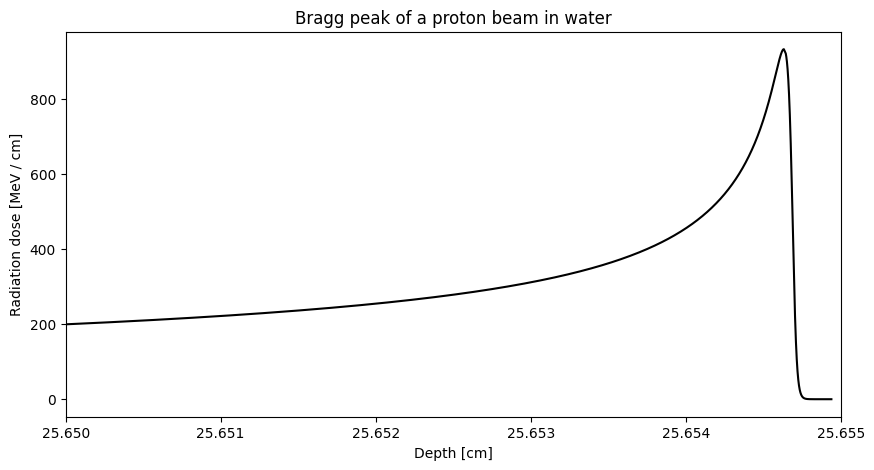

In [48]:
from protonic import bethebloch, elements, projectiles, compounds
import matplotlib.pyplot as plt

# delta x
delta_x = max_delta_x = 0.01 # cm
min_delta_x = 1e-7

# Initial values
xi = xcm = 0 # initial depth
E = 200 # initial energy of proton in MeV

# vector to store values
vecE = []
vecX = []
vecdX = []

# materials and projectiles to use 
projectile = projectiles.get("proton")
material = compounds.get("H2O") # water

# Numerical integration
while True:
    xi += delta_x # move to next depth
    xcm = xi / material.rho

    dEdx = bethebloch(E, material, projectile) 
    if dEdx < 0: 
       break
    elif len(vecE) > 0: 
        delta_x = max(min(0.01, delta_x / (dEdx - vecE[-1])), 1e-7) # calculate new delta x
        
    # update energy
    E = E - dEdx * delta_x 

    # add values to vectors
    vecE.append(dEdx)
    vecX.append(xcm)
    vecdX.append(delta_x)

# plotting
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(vecX, vecE, '-k')
ax.set_xlim(25.65,25.655)
ax.set_xlabel("Depth [cm]")
ax.set_ylabel("Radiation dose [MeV / cm]")
ax.set_title("Bragg peak of a proton beam in water")